<a href="https://colab.research.google.com/github/Josephat-Onkoba/-Study-Python/blob/master/CROP_RECOMMENDATIONS_TO_FARMERS_Copy1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing relevant packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# loading the dataset
data=pd.read_csv(r'Desktop/crop_recommendation.csv')

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
data.shape

(2200, 8)

In [ ]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
data.loc[data.duplicated()]

,N,P,K,temperature,humidity,ph,rainfall,label


In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
corr=data.drop(['label'],axis=1).corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [ ]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
     'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
data['crop_num']=data['label'].map(crop_dict)

In [ ]:
data=data.drop('label',axis=1)

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


<Axes: >

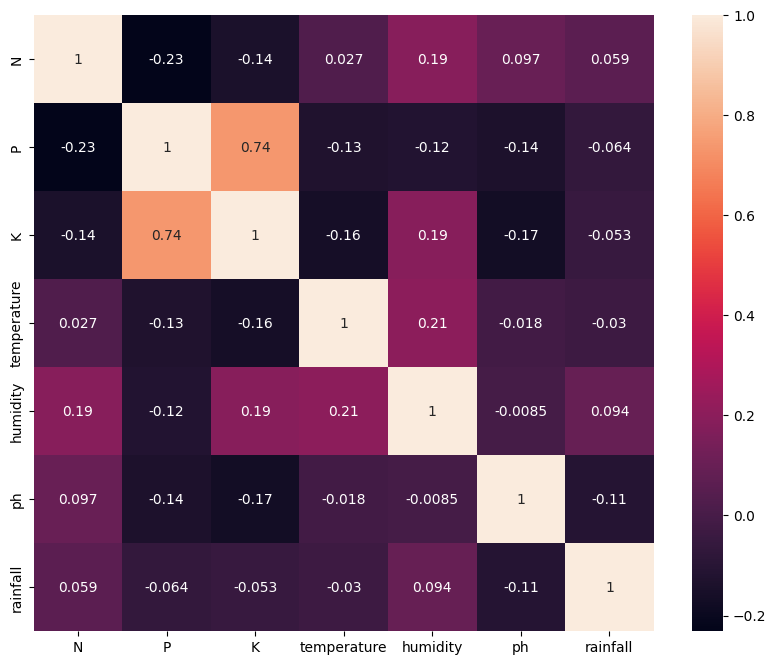

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cbar=True)

**TRAIN TEST SPLIT**

In [ ]:
X=data.drop('crop_num',axis=1)
y=data['crop_num']

In [ ]:
#importing train test split package
from sklearn.model_selection import train_test_split

In [ ]:
# data splitting to train set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Data normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
#stardardizing x_train set
scaler.fit(X_train)

StandardScaler()

In [ ]:
#transforming x_train
scaled_data=scaler.transform(X_train)

In [ ]:
#transforming x_train
test_transformed=scaler.transform(X_test)

**MODELS**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

**Logistic Regression**

In [ ]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predict1=logmodel.predict(X_test)

In [ ]:
accuracy_score(y_test,predict1)*100

94.54545454545455

**Random Forest Classifier**

In [ ]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
ypred=classifier.predict(X_test)

In [ ]:
accuracy_score(y_test,ypred)*100

99.31818181818181

**Gradient Boosting**

In [ ]:
Gbc=GradientBoostingClassifier()
Gbc.fit(X_train,y_train)
predict4=Gbc.predict(X_test)

In [ ]:
accuracy_score(y_test,predict4)*100

98.18181818181819

**MODEL VALIDATION**

In [ ]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    prediction = classifier.predict(features).reshape(1,-1)
    predictions = classifier.predict_proba(features)[0]
    predictions = np.argsort(predictions)[::-1]
    top_3 = predictions[:3]
    return prediction[0],top_3

In [ ]:
def get_crop(indices):
    crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
              14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
    return crop_dict[indices + 1]

In [ ]:
N = 2.24
P = 0
k = 283
temperature = 40.0
humidity = 20
ph = 5.94
rainfall = 100

predict,recomended = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
              14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

# if predict[0] in crop_dict:
#     crop = crop_dict[predict[0]]
#     print("{} is a best crop to be cultivated ".format(crop))
# else:
#     print("Sorry are not able to recommend a proper crop for this environment")

recomendations = [get_crop(crop_index) for crop_index in recomended]
print(recomendations)

['Mango', 'Chickpea', 'Grapes']


In [ ]:
predict

array([12], dtype=int64)

**MODEL DEPLOYMENT**

In [ ]:
#saving the model
import pickle

In [ ]:
with open('pi.pkl','wb') as file:
    pickle.dump(classifier,file)


In [ ]:
with open('pi.pkl','rb') as file:
    model=pickle.load(file)

In [ ]:
mkdir MkulimaSmarts

In [ ]:
%%html

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>M-kulimaSmart</title>

    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            margin: 0;
            padding: 0;
            display: flex;
            flex-direction: column;
            align-items: center;
            justify-content: center;
            height: 100vh;
        }

        h1 {
            color: #333;
        }

        form {
            background-color: #fff;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
            width: 300px;
        }

        label {
            display: block;
            margin: 10px 0 5px;
            color: #555;
        }

        input {
            width: 100%;
            padding: 8px;
            margin-bottom: 10px;
            box-sizing: border-box;
            border: 1px solid #ccc;
            border-radius: 4px;
        }

        button {
            background-color: #4caf50;
            color: #fff;
            padding: 10px;
            border: none;
            border-radius: 4px;
            cursor: pointer;
        }

        button:hover {
            background-color: #45a049;
        }
    </style>
</head>
<body>
    <h1>Data Collection Form</h1>

    <form action="/predict" method="post">
        <label for="nitrogen">Nitrogen (N):</label>
        <input type="text" id="nitrogen" name="nitrogen" required>

        <label for="phosphorus">Phosphorus (P):</label>
        <input type="text" id="phosphorus" name="phosphorus" required>

        <label for="potassium">Potassium (K):</label>
        <input type="text" id="potassium" name="potassium" required>

        <label for="temperature">Temperature:</label>
        <input type="text" id="temperature" name="temperature" required>

        <label for="humidity">Humidity:</label>
        <input type="text" id="humidity" name="humidity" required>

        <label for="ph">pH:</label>
        <input type="text" id="ph" name="ph" required>

        <label for="rainfall">Rainfall:</label>
        <input type="text" id="rainfall" name="rainfall" required>

        <button type="submit">Submit</button>
    </form>
</body>
</html>